In [1]:
from taxumap.taxumap_base import Taxumap

import seaborn as sns
from matplotlib import pyplot as plt


# Outline

This notebook demonstrates how different `agg_levels` and `weights` adjust the final TaxUMAP embedding.

## Brief description of `agg_levels`

* `agg_levels` designate which taxonomic levels TaxUMAP should consider when incorporating the hierarchical information into UMAP.
* `agg_levels` is a python `list` with strings as values, each corresponding to the taxonomic levels TaxUMAP will utilize.
* `agg_levels` must be ordered left -> right in ***increasing*** specificity, e.g., `['Kingdom', 'Genus']` or `['Phylum', 'Order']`.
* By default, `agg_levels` is set to `['Phylum', 'Family']`.


## Brief description of `weights`

* `weights` designate the weight given to each taxonomic label in `agg_levels`
* For example, if using the default `agg_levels` of `['Phylum', 'Family']`, a `weights` parameter of [1, 1] says that these should be weighted the same.
* By default, `weights` is set to `[1, 1]` to correspond to default `agg_levels` of `['Phylum', 'Family']`.
* Weights should be any positive number.
* For more information, please see documentation on the GitHub page.

## Very Important Detail

* Since `weights` designate the weight given to each label in `agg_levels`, ***`weights` and `agg_levels` must be the same length***. 

## Examples

#### Default example

* In the below example, we're using the *default* settings in TaxUMAP, which are for `agg_levels=['Phylum', 'Family']` with `weights=[1,1]`.


* Since `agg_levels=['Phylum', 'Family']` with `weights=[1,1]` is the default, the code blocks:

```python
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
)
```

and 


```python
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
    agg_levels=["Phylum", "Family"],
    weights=[1, 1],
)
```

are equivalent.

transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='taxumap-PF-1', ylabel='taxumap-PF-2'>)

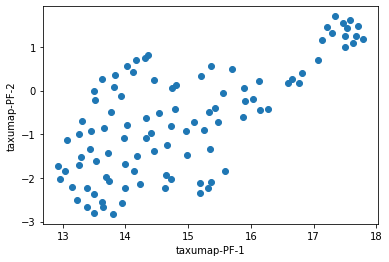

In [2]:
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
    agg_levels=["Phylum", "Family"],
    weights=[1, 1],
)

tu.transform_self()

tu.scatter()



#### Adjusting `agg_levels`

* In the below example, we are running a TaxUMAP with `agg_levels=['Phylum', 'Order']` and `weights=[1,1]`.
* Notice that, compared to the above ***`agg_levels=['Phylum', 'Family']`*** and `weights=[1,1]` scatterplot, the embedding is slightly different. This is because TaxUMAP is considering different taxonomic levels when generating the embedding.

transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='taxumap-PO-1', ylabel='taxumap-PO-2'>)

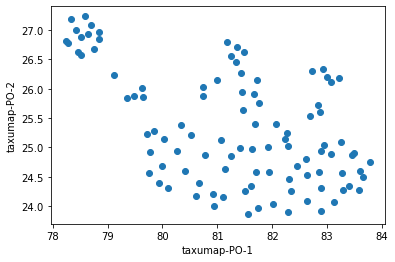

In [3]:
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
    agg_levels=["Phylum", "Order"],
    weights=[1, 1],
)

tu.transform_self()

tu.scatter()


#### Adjusting `weights`

* In the below example, we are running a TaxUMAP with `agg_levels=['Phylum', 'Family']` and ***`weights=[1,10]`***.
* Since the family is heavily weighted, new sub-groups separate out.

transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='taxumap-PF-1', ylabel='taxumap-PF-2'>)

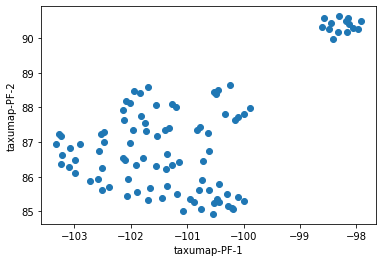

In [4]:
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
    agg_levels=["Phylum", "Family"],
    weights=[1, 10],
)

tu.transform_self()

tu.scatter()


#### Adjusting `weights` (again)

* In the below example, we are running a TaxUMAP with `agg_levels=['Phylum', 'Family']` and ***`weights=[10,1]`***.
* Notice how the structure of this TaxUMAP drastically changes. Three distinct arms form, each enriched in one of the three major phyla in the data.

transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='taxumap-PF-1', ylabel='taxumap-PF-2'>)

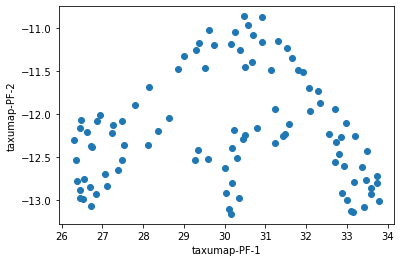

In [5]:
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
    agg_levels=["Phylum", "Family"],
    weights=[10, 1],
)

tu.transform_self()

tu.scatter()


In the below plot, I will use Seaborn to visualize the fact that these three "arms" are actually representative of different domination states.

To do this, I will use two DataFrames built into the TaxUMAP object, `tu`: `tu.df_dominant_taxon` and `tu.df_embedding`.

In [6]:
# This helper table can be generated from your TaxUMAP `tu` object.
tu.df_dominant_taxon

,max_tax,dom_kingdom,dom_phylum,dom_class,dom_order,dom_family,dom_genus
index_column,,,,,,,
66600164,Uniq1,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus
66600169,Uniq1,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus
66600226,Uniq1,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus
66627214,Uniq1,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus
66627235,Uniq1,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus
...,...,...,...,...,...,...,...
66627255,Uniq9,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Klebsiella
66627277,Uniq9,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Klebsiella
66627283,Uniq9,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Klebsiella


In [7]:
# This table is how to directly access your TaxUMAP embedding.
tu.df_embedding

,taxumap1,taxumap2
index_column,,
66600164,26.528158,-12.988959
66600169,26.688627,-12.850113
66600209,33.730305,-12.803631
66600224,32.105534,-11.960657
66600226,26.455608,-12.972924
...,...,...
66704977,29.350224,-12.419820
66704978,29.274061,-12.533113
66704990,30.497831,-11.453741


In [8]:
# Here, I will merge these two dataframes to easily visualize the TaxUMAP.
df_plot = tu.df_dominant_taxon[['dom_phylum']].join(tu.df_embedding)
df_plot

,dom_phylum,taxumap1,taxumap2
index_column,,,
66600164,Firmicutes,26.528158,-12.988959
66600169,Firmicutes,26.688627,-12.850113
66600226,Firmicutes,26.455608,-12.972924
66627214,Firmicutes,26.440739,-12.884742
66627235,Firmicutes,27.120724,-12.833560
...,...,...,...
66627255,Proteobacteria,30.577490,-10.959891
66627277,Proteobacteria,33.582222,-12.853291
66627283,Proteobacteria,31.658268,-11.352433


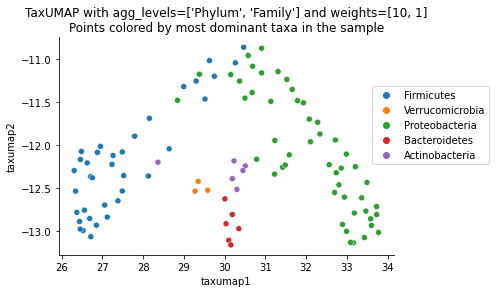

In [9]:
fig, ax = plt.subplots()

sns.scatterplot(x='taxumap1', y='taxumap2', hue='dom_phylum', data=df_plot, ax=ax)

ax.legend(loc='upper right', bbox_to_anchor=[1.3, 0.8])
ax.set_title("TaxUMAP with agg_levels=['Phylum', 'Family'] and weights=[10, 1]\nPoints colored by most dominant taxa in the sample")

sns.despine()

You can see in the above graph that by heavily weighing the phylum in TaxUMAP, we can see that there is structure in the TaxUMAP based on what phylum dominates.